# Lecture10. Deep Learning model(CNN)

#### - 목차 -

[0. tensorflow 불러오기](#0.-tensorflow-불러오기)  

[1. MNIST 데이터셋 임포트](#1.-MNIST-데이터셋-임포트)  

[2. train & test dataset 만들기](#2.-train-&-test-dataset-만들기)   

[3. 모델 구성](#3.-모델-구성)   

[4. 모델 컴파일](#4.-모델-컴파일)  

[5. 모델 훈련](#5.-모델-훈련)  

[6. 정확도 평가](#6.-정확도-평가)   

[7. 예측 결과 확인](#7.-예측-결과-확인) 

## 0. tensorflow 불러오기

In [1]:
import tensorflow as tf

## 1. MNIST 데이터셋 임포트

In [19]:
mnist = tf.keras.datasets.mnist  # tensorflow에서 직접 MNIST 손글씨 이미지 데이터셋을 불러와서 사용
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [20]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [21]:
y_train[0]

5

x_train[0]은 5를 나타내는 image data의 모습이다.

#### 데이터 설명

MNIST 데이터셋은 28x28 사이즈의 손글씨 데이터셋입니다. 0~9까지 총 10개의 클래스를 가지고 있으며, 색상 채널이 없는 흑백 이미지입니다.

![nn](손글씨데이터_이미지.png)

## 2. train & test dataset 만들기

x값은 0 ~ 255 사이의 값을 갖는 픽셀값들을 0~1 사이의 값을 갖도록 변환하고  
y값은 정수 인코딩 된 결과로부터 원-핫 인코딩을 수행한다.

In [22]:
import keras

img_rows = 28
img_cols = 28

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

input_shape = (img_rows, img_cols, 1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print('x_train shape:', x_train.shape)
print('train samples : ', x_train.shape[0])
print('test samples : ', x_test.shape[0])

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

print("")
print('train target value samples : ', y_train[0])
print('test target value samples : ', y_test[0])

x_train shape: (60000, 28, 28, 1)
train samples :  60000
test samples :  10000

train target value samples :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
test target value samples :  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


## 3. 모델 구성

![nn](CNN구조이미지.png)

* Flatten() : 7 x 7 픽셀 64 개의 채널의 값들을 7x7x64개 1차원 배열로 변환합니다.
* Conv2D : 2차원 이미지를 다루는 convolution layer class이다.
* maxpooling2D : 주요 값만 뽑아내어 작은 출력 값을 만들어 냅니다.  
* Dense() : 완전 연결된 층 (Fully-connected layer)를 구성합니다.
* 활성화 함수 (activation function)로는 각각 ReLU와 softmax를 사용합니다.

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1000)             

위의 사진과 비교해보면 똑같이 이루어져 있음을 볼 수 있다.

## 4. 모델 컴파일

학습 과정에서 손실 함수 (Loss function)를 줄이기 위해 사용되는 optimizer로는 Adam (Adaptive Momentum estimation)을 사용합니다.

손실 함수는 ‘categorical_crossentropy’를 지정하고, 평가 지표로는 정확도 (accuracy)를 사용합니다.

정확도는 테스트 이미지 중 올바르게 분류한 비율을 의미합니다.

In [28]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1000)             

## 5. 모델 훈련

model.fit() 메서드에 학습 데이터와, 레이블, 에포크를 순서대로 입력하면, 학습이 이루어집니다.

에포크(epoch)는 60,000개의 전체 학습 데이터를 몇 번 반복해서 학습할지를 의미합니다.

학습 과정은 아래와 같이 이루어지며, 학습 데이터에 대한 정확도가 출력됩니다.

In [29]:
model.fit(x_train, y_train, batch_size = 128, epochs=10,verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 42s 90ms/step - loss: 0.4217 - accuracy: 0.8675 - val_loss: 0.0489 - val_accuracy: 0.9850
Epoch 2/10
469/469 [==============================] - 82s 175ms/step - loss: 0.0627 - accuracy: 0.9805 - val_loss: 0.0364 - val_accuracy: 0.9890
Epoch 3/10
469/469 [==============================] - 80s 170ms/step - loss: 0.0484 - accuracy: 0.9851 - val_loss: 0.0296 - val_accuracy: 0.9903
Epoch 4/10
469/469 [==============================] - 79s 167ms/step - loss: 0.0324 - accuracy: 0.9893 - val_loss: 0.0223 - val_accuracy: 0.9918
Epoch 5/10
469/469 [==============================] - 79s 169ms/step - loss: 0.0322 - accuracy: 0.9893 - val_loss: 0.0243 - val_accuracy: 0.9911
Epoch 6/10
469/469 [==============================] - 79s 169ms/step - loss: 0.0248 - accuracy: 0.9918 - val_loss: 0.0243 - val_accuracy: 0.9915
Epoch 7/10
469/469 [==============================] - 81s 173ms/step - loss: 0.0243 - accuracy: 0.9919 - val_loss: 0.0247 - val_acc

## 6. 정확도 평가

model.evaluate()를 이용해서 테스트 샘플에 대해 손실 (loss)과 정확도 (accuracy)를 평가한다.

In [30]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('손실도:', loss)
print('정확도:', acc)

손실도: 0.02470732480287552
정확도: 0.9916999936103821


## 7. 예측 결과 확인

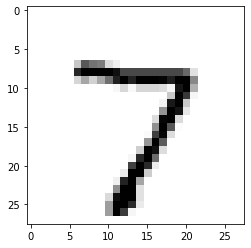

The Answer is  [7]


C:\Users\tjdwl\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [33]:
import matplotlib.pyplot as plt

n = 0
plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

print('The Answer is ', model.predict_classes(x_test[n].reshape((1, 28, 28, 1))))